In [ ]:
# 모듈 및 데이터 로드
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()

# x, y 데이터 생성
X = data.data

# 악성을 1, 양성을 0으로
y = 1 - data.target

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10]

# 로지스틱 회귀 모델 생성
model_lor = LogisticRegression(solver = 'lbfgs')
model_lor.fit(X,y)
y_pred = model_lor.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [ ]:
# 종속 변수와 예측 결과로 혼동 행렬 생성

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)

[[337  20]
 [ 30 182]]


* 정확도

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)

#소수점 네번째 자리까지
print(f'정확도: {accuracy:.4f}')

정확도: 0.9121


* 정밀도

In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y, y_pred)
print(f'정밀도: {precision:.4f}')

정밀도: 0.9010


* 재현율

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y, y_pred)
print(f'재현율: {recall:.4f}')

재현율: 0.8585


* F1 score

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y, y_pred)
print(f'F1 score: {f1:.4f}')

F1 score: 0.8792


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [ ]:
from sklearn.preprocessing import Binarizer

In [ ]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기


#예측 확률
y_pred_proba = model_lor.predict_proba(X)

#y_pred 정의
binarizer = Binarizer(threshold=0.1)
y_pred2 = binarizer.fit_transform(y_pred_proba[:, [0]])

#혼동 행렬
conf_matrix2 = confusion_matrix(y, y_pred2)
print(f'혼동 행렬:\n{conf_matrix2}')

#정확도
accuracy2 = accuracy_score(y, y_pred2)
print(f'정확도: {accuracy2:.4f}')

# 정밀도
precision2 = precision_score(y, y_pred2)
print(f'정밀도: {precision2:.4f}')

# 재현율
recall2 = recall_score(y, y_pred2)
print(f'재현율: {recall2:.4f}')

# F1 score
f1_2 = f1_score(y, y_pred2)
print(f'F1 score: {f1_2:.4f}')

혼동 행렬:
[[  1 356]
 [139  73]]
정확도: 0.1301
정밀도: 0.1702
재현율: 0.3443
F1 score: 0.2278


* ROC 곡선 시각화

In [ ]:
from sklearn.metrics import roc_curve

y_pred_proba_positive = model_lor.predict_proba(X)[:, 1]
fpr, tpr, thresholds = roc_curve(y, y_pred_proba_positive)

Text(0, 0.5, 'TPR')

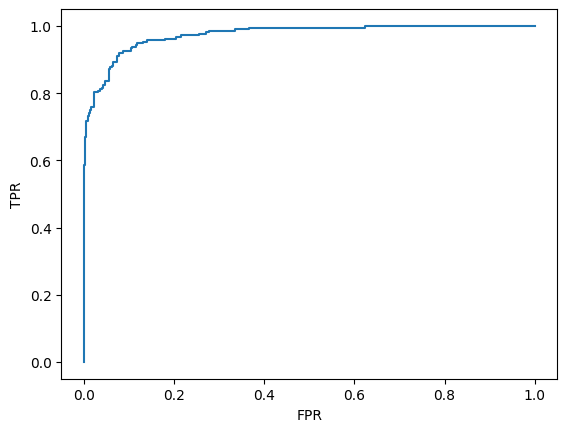

In [ ]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

* ROC AUC 값

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y, y_pred_proba_positive)
print(f'ROC AUC: {roc_auc:.4f}')

ROC AUC: 0.9741
